**Big Mart Sales prediction Using Neural Networks**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import sklearn

In [2]:
#importing dataset
train_set = pd.read_csv("Train.csv")
test_set = pd.read_csv("Test.csv")
train_set.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train_set.shape, test_set.shape

((8523, 12), (5681, 11))

In [4]:
train_set.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

1. There are 1463 missing values in Item_weight 
2. There are 2410 missing values in Outlet_Size

Imputing these missing values

In [5]:
#imputing with mean of the Item_weight
train_set.Item_Weight.fillna(train_set.Item_Weight.mean(), inplace = True)
#imputing the outlet size with mode of Outlet Size
train_set.Outlet_Size.fillna(train_set.Outlet_Size.mode()[0], inplace = True)

In [6]:
train_set.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [7]:
train_set.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Performing Encoding of Categorical variables

1. Item_Fat_Content
2. Item_Type
3. Outlet_Identifier
4. Outlet_Size
5. Outlet_Location_Type
6. Outlet_Type

In [8]:
train_set.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [9]:
train_set.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [10]:
train_set.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [11]:
train_set.Outlet_Size.value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [12]:
train_set.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [13]:
train_set.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Performing Label Encoding of these Categorical variables

In [14]:
train_set.Item_Fat_Content = train_set.Item_Fat_Content.map({"Low Fat": 1, "LF": 1, "Regular": 2, "reg": 2, "low fat": 1})
train_set.Outlet_Size = train_set.Outlet_Size.map({"Small": 1, "Medium": 2, "High": 3})
train_set.Outlet_Location_Type = train_set.Outlet_Location_Type.map({"Tier 3": 3, "Tier 2": 2, "Tier 1": 1})

In [15]:
#dropping item_identifier
train_set.drop(["Item_Identifier", "Outlet_Establishment_Year"], axis = 1, inplace = True)

In [16]:
#One hot encoding
train_set_encoded = pd.get_dummies(train_set, columns = ["Item_Type", "Outlet_Identifier", "Outlet_Type"])
train_set_encoded.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,1,0.016047,249.8092,2,1,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,5.92,2,0.019278,48.2692,2,3,443.4228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,17.50,1,0.016760,141.6180,2,1,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,19.20,2,0.000000,182.0950,2,3,732.3800,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,8.93,1,0.000000,53.8614,3,3,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Scaling the data

In [17]:
def Min_Max_scale(cols, is_train):
  if is_train == 1:
    for i in cols:
      train_set_encoded[i] = ( train_set[i] - train_set[i].min() )/( train_set[i].max() - train_set[i].min() )
  else:
    for i in cols:
      test_set_encoded[i] = ( test_set[i] - test_set[i].min() )/( test_set[i].max() - test_set[i].min() )



In [18]:
columns = ["Item_Weight", "Item_Visibility", "Item_MRP"]
Min_Max_scale(columns, 1)
train_set_encoded.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,1,0.048866,0.927507,2,1,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0.081274,2,0.058705,0.072068,2,3,443.4228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0.770765,1,0.051037,0.468288,2,1,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,0.871986,2,0.000000,0.640093,2,3,732.3800,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.260494,1,0.000000,0.095805,3,3,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


**Model building**

In [19]:
from keras.models import Sequential
from keras.layers import Dense

Splitting the data into train and test set

In [20]:
#splitting into dependent and independent variable
x = train_set_encoded.drop(["Item_Outlet_Sales"], axis = 1)
y = train_set_encoded["Item_Outlet_Sales"]

In [21]:
model = Sequential()
n_cols = x.shape[1]

model.add(Dense(45, activation='relu', input_shape = (n_cols, )))
model.add(Dense(75, activation='relu'))
model.add(Dense(76, activation='relu'))
model.add(Dense(75, activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(1, activation='linear'))

In [22]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 45)                1665      
                                                                 
 dense_1 (Dense)             (None, 75)                3450      
                                                                 
 dense_2 (Dense)             (None, 76)                5776      
                                                                 
 dense_3 (Dense)             (None, 75)                5775      
                                                                 
 dense_4 (Dense)             (None, 45)                3420      
                                                                 
 dense_5 (Dense)             (None, 1)                 46        
                                                                 
Total params: 20,132
Trainable params: 20,132
Non-traina

We can now train the model

In [24]:
history = model.fit(x, y, epochs=100, batch_size=500, validation_split = 0.30)

Epoch 1/100
12/12 [==============================] - 1s 29ms/step - loss: 2188.6343 - mean_absolute_error: 2188.6343 - val_loss: 2159.2021 - val_mean_absolute_error: 2159.2021
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 2183.2739 - mean_absolute_error: 2183.2739 - val_loss: 2147.8594 - val_mean_absolute_error: 2147.8594
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 2157.8022 - mean_absolute_error: 2157.8022 - val_loss: 2094.8901 - val_mean_absolute_error: 2094.8904
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 2048.9431 - mean_absolute_error: 2048.9431 - val_loss: 1889.1849 - val_mean_absolute_error: 1889.1849
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 1704.7686 - mean_absolute_error: 1704.7686 - val_loss: 1404.4124 - val_mean_absolute_error: 1404.4124
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 1313.2871 - mean_absolute_error: 1313.2871 - val_

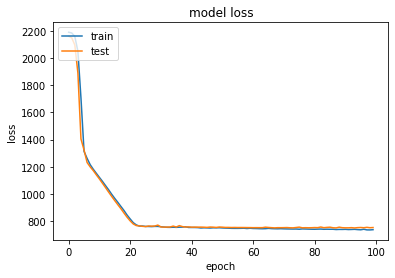

In [25]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Performing Preprocessing on Test Set

In [26]:
#missing values in test set
test_set.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [27]:
#imputing with mean of the Item_weight
test_set.Item_Weight.fillna(test_set.Item_Weight.mean(), inplace = True)
#imputing the outlet size with mode of Outlet Size
test_set.Outlet_Size.fillna(test_set.Outlet_Size.mode()[0], inplace = True)

In [28]:
test_set.Item_Fat_Content = test_set.Item_Fat_Content.map({"Low Fat": 1, "LF": 1, "Regular": 2, "reg": 2, "low fat": 1})
test_set.Outlet_Size = test_set.Outlet_Size.map({"Small": 1, "Medium": 2, "High": 3})
test_set.Outlet_Location_Type = test_set.Outlet_Location_Type.map({"Tier 3": 3, "Tier 2": 2, "Tier 1": 1})

In [29]:
#dropping item_identifier
test_set.drop(["Item_Identifier", "Outlet_Establishment_Year"], axis = 1, inplace = True)

In [30]:
#One hot encoding
test_set_encoded = pd.get_dummies(test_set, columns = ["Item_Type", "Outlet_Identifier", "Outlet_Type"])
test_set_encoded.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,1,0.007565,107.8622,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,8.300000,2,0.038428,87.3198,2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,14.600000,1,0.099575,241.7538,2,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,7.315000,1,0.015388,155.0340,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,12.695633,2,0.118599,234.2300,2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [31]:
columns = ["Item_Weight", "Item_Visibility", "Item_MRP"]
Min_Max_scale(columns, 0)

In [32]:
#Preprocessed data
test_set_encoded.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.964275,1,0.023374,0.323413,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0.222983,2,0.118737,0.235849,2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.598095,1,0.307674,0.894140,2,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.164335,1,0.047548,0.524488,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.484706,2,0.366458,0.862069,2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [33]:
#converting all the datatypes to float
X = np.asarray(test_set_encoded).astype(np.float32)

In [34]:
X = pd.DataFrame( X, columns = test_set_encoded.columns )
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.964275,1.0,0.023374,0.323413,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.222983,2.0,0.118737,0.235849,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.598095,1.0,0.307674,0.894140,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.164335,1.0,0.047548,0.524488,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.484706,2.0,0.366458,0.862069,2.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
predictions = model.predict(X)
predictions

array([[1838.3119 ],
       [1335.0901 ],
       [ 564.73083],
       ...,
       [1697.6226 ],
       [3832.0217 ],
       [1179.8153 ]], dtype=float32)

In [36]:
final_set = test_set
final_set['Item_Outlet_Sales'] = predictions

In [37]:
final_set.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,20.750000,1,0.007565,Snack Foods,107.8622,OUT049,2,1,Supermarket Type1,1838.311890
1,8.300000,2,0.038428,Dairy,87.3198,OUT017,2,2,Supermarket Type1,1335.090088
2,14.600000,1,0.099575,Others,241.7538,OUT010,2,3,Grocery Store,564.730835
3,7.315000,1,0.015388,Snack Foods,155.0340,OUT017,2,2,Supermarket Type1,2659.382568
4,12.695633,2,0.118599,Dairy,234.2300,OUT027,2,3,Supermarket Type3,5802.956055


In [38]:
final_set['Item_Outlet_Sales'].min(), final_set['Item_Outlet_Sales'].max()

(64.35347747802734, 6592.28271484375)

In [39]:
final_set.to_csv("Answer.csv")